# Eight Queens Genetic Algorithim

In [39]:
import random

from scipy import special

def generate_board_state(number_of_queens):
    return [random.randrange(number_of_queens) for num in range(number_of_queens )]

def generate_population(number_of_queens=8, size_of_population=19):
        return [generate_board_state(number_of_queens) for _ in range(size_of_population)]

def check_for_completed_board(boards, number_of_queens, perfect_score):
    for board in boards:
        if generate_fitness_score(board, number_of_queens) == perfect_score:
            return board

    return []


In [40]:
def generate_fitness_score(board_state, number_of_queens):
    """determine number of queens not being attacked
        :input board_state array of queens
    """
    fitness_score = 0

    for determining_row_index in range(number_of_queens):
        determining_value = board_state[determining_row_index]
        for row_index in range(number_of_queens):
            # can't attack itself
            if determining_row_index == row_index:
                continue
            if board_state[row_index] == determining_value:
                continue
            if row_index + board_state[row_index] == determining_row_index + determining_value:
                continue
            if row_index - board_state[row_index] == determining_row_index - determining_value:
                continue

            fitness_score += 1

    return fitness_score / 2


## test genereate fitness score
generate_fitness_score([7,1,4,2,0,6,3,5], number_of_queens=8) == 28

True

In [41]:
def _random_weighted_choice(population, weights, selected=None):
    """pick one from list proportional to weights"""

    if selected is not None:
        index = population.index(selected)
        population = population[:index] + population[index+1:]
        weights = weights[:index] + weights[index+1:]

    return random.choices(population, weights=weights, k=1)[0]


def selection(boards, fitness_scores, size_of_population):
    """return a list of selected pairs"""

    selected = []
    for _ in range(size_of_population):
        parent_one = _random_weighted_choice(boards, fitness_scores)
        parent_two = _random_weighted_choice(boards, fitness_scores, selected=parent_one)

        selected.append((parent_one, parent_two))

    return selected

test_population = [[1],[2],]
weights = [1,1]

selection(test_population, weights, size_of_population=2)

test_population = [[1],[2],[3],[4]]
weights = [19,20,26,16]

selection(test_population, weights, size_of_population=4)


[([3], [1]), ([1], [2]), ([4], [2]), ([3], [4])]

In [42]:

def _crssover(parent_one, parent_two, cross_over_index):
    return parent_one[:cross_over_index] + parent_two[cross_over_index:]

def crossover(selected_pairs, number_of_queens):

    children = []
    for s_p in selected_pairs:
        # generate random cross over points - 0 - max number of queens
        cross_over_index = random.randint(0, number_of_queens - 1)
        parent_one = s_p[0]
        parent_two = s_p[1]   

        child = _crssover(parent_one, parent_two, cross_over_index)
        children.append(child)

    return children


crossover([([1,1,1,1,1,1,1,1], [0,0,0,0,0,0,0,0])], number_of_queens=8)

[[1, 1, 1, 1, 1, 1, 1, 0]]

In [47]:
# def _mutate(board, number_of_queens):
#     mutation_point = random.randint(0, number_of_queens - 1)

#     current_value = board[mutation_point]
#     new_value = current_value

#     while new_value == current_value:
#         new_value = random.randint(0, number_of_queens - 1)

#     board[mutation_point] = new_value

#     return board

import random

def _mutate(current_value, number_of_queens):
    new_value = current_value

    while new_value == current_value:
        new_value = random.randint(0, number_of_queens - 1)

    return new_value


def mutation(boards, mutation_frequency, number_of_queens):        
    for i,board in enumerate(boards):
        for s_i, value in enumerate(board):
            x = random.randint(1, mutation_frequency)
            if x == 1:
                board[s_i] = _mutate(board[s_i], number_of_queens)
    return boards


_mutate([1,2,3], 3)
mutation([[1,2,3,4]], 1, 4)

[[3, 3, 2, 2]]

In [48]:
def generation(population, size_of_population, number_of_queens, mutation_frequency):
    # b) fitness function
    # a fitness score is calculated based off the number of non attacking queen pairs
    fit_scores = [generate_fitness_score(board, number_of_queens) for board in population]

    # fitness scores

    # c) select parents
    # two parents are selected at random - in accordance with probability from score in b)
    # a cross over point is chosen at random from positions in the string
    selected_pairs = selection(population, fit_scores, size_of_population)
    
    # d) cross over
    # offspring are created by crossing over parent strings at the crossover point
    # crossover(selected_pairs,number_of_queens)
    children = crossover(selected_pairs, number_of_queens)


    # e) mutation
        # each location is subject to random mutation with a small independent probability
        # this involves choosing a queen at random and moving it to a random square in its column
    mutated = mutation(children, mutation_frequency, number_of_queens)

    return mutated, fit_scores

    # f) TODO is this a thing?????
    # introduce previous top scoring offspring to keep fitness ??? is this part of original algo?? or an optimisation????


In [49]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=19
MUTATION_FREQUENCY = 15
# TODO HOW IS THIS CALCULATED
perfect_score = special.comb(NUMBER_OF_QUEENS, 2)


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_board = []

    # # g) check if it has found correct state and exit loop
    while not completed_board:
        population, fitness_scores = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY)
        completed_board = check_for_completed_board(population, NUMBER_OF_QUEENS, perfect_score)
        gen += 1

        if gen == 100000:
            break
        # if gen % 1000 == 0:
        #     print(f"run for {gen} generations")

    stop_time = timeit.default_timer()

    print(f"elapsed_time: {stop_time - start_time}")
    print(f"number_of_generations: {gen}")
    print(f"completed_state: {completed_board}")
    print("=========================")

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_board
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

elapsed_time: 11.913775899998654
number_of_generations: 6382
completed_state: [5, 1, 6, 0, 3, 7, 4, 2]


{'elapsed_time': 11.913775899998654,
 'number_of_generations': 6382,
 'completed_state': [5, 1, 6, 0, 3, 7, 4, 2]}

In [50]:
## generate test population
## only need to do this once

# import pickle

# NUMBER_OF_QUEENS=8
# SIZE_OF_POPULATION=19
# MUTATION_FREQUENCY = 15
# # TODO HOW IS THIS CALCULATED
# perfect_score = special.comb(NUMBER_OF_QUEENS, 2)


# # generate test populations

# test_population = []

# for i in range(100):
#         test_population.append( generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION))

# with open('test_populations', 'wb') as f:
#         pickle.dump(test_population, f)

In [51]:
import pickle

with open('test_populations', 'rb') as f:
    test_population = pickle.load(f)


In [52]:
# run algo on all test populations

file = open("test_populations",'rb')
object_file = pickle.load(file)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

results

elapsed_time: 17.31262439999955
number_of_generations: 7482
completed_state: [7, 2, 0, 5, 1, 4, 6, 3]
elapsed_time: 4.0147228999994695
number_of_generations: 1759
completed_state: [2, 5, 7, 0, 3, 6, 4, 1]
elapsed_time: 28.554662099999405
number_of_generations: 12887
completed_state: [5, 3, 6, 0, 7, 1, 4, 2]
elapsed_time: 9.591400000001158
number_of_generations: 4666
completed_state: [0, 4, 7, 5, 2, 6, 1, 3]
elapsed_time: 1.2250445000008767
number_of_generations: 568
completed_state: [3, 1, 4, 7, 5, 0, 2, 6]
elapsed_time: 1.594908299999588
number_of_generations: 773
completed_state: [3, 1, 6, 2, 5, 7, 4, 0]
elapsed_time: 5.106919500000004
number_of_generations: 1854
completed_state: [7, 1, 3, 0, 6, 4, 2, 5]
elapsed_time: 1.9351178999986587
number_of_generations: 818
completed_state: [1, 5, 7, 2, 0, 3, 6, 4]
elapsed_time: 2.6356464000000415
number_of_generations: 1059
completed_state: [0, 6, 3, 5, 7, 1, 4, 2]
elapsed_time: 29.476834499999313
number_of_generations: 11083
completed_state: 

{'elapsed_time': [17.31262439999955,
  4.0147228999994695,
  28.554662099999405,
  9.591400000001158,
  1.2250445000008767,
  1.594908299999588,
  5.106919500000004,
  1.9351178999986587,
  2.6356464000000415,
  29.476834499999313,
  4.097868400000152,
  2.651156899999478,
  22.638133099999322,
  0.23104939999939234,
  19.0510033999999,
  0.46877560000029916,
  1.245150200000353,
  20.89440730000024,
  6.744914799999606,
  18.47082649999902,
  3.9041661999999633,
  7.880711899999369,
  8.176399899999524,
  19.808802199999263,
  28.3688785000013,
  4.874024200000349,
  2.449324400000478,
  77.66709079999964,
  56.98134399999981,
  16.457575099999303,
  8.369123500000569,
  5.013442100000248,
  6.769169099999999,
  51.34387529999913,
  32.540279900000314,
  1.3013169000005291,
  30.85875279999891,
  23.830637099999876,
  52.162186499999734,
  49.78150970000024,
  30.522646100000202,
  0.7536456999987422,
  3.4250529000000824,
  24.108720399999584,
  17.818124099998386,
  2.95166400000016

In [81]:
import os

unique_identifier = "100_results_new_mutation"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "perfect_score": perfect_score
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()


In [89]:
import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


    elapsed_time  number_of_generations           completed_state
0      17.312624                   7482  [7, 2, 0, 5, 1, 4, 6, 3]
1       4.014723                   1759  [2, 5, 7, 0, 3, 6, 4, 1]
2      28.554662                  12887  [5, 3, 6, 0, 7, 1, 4, 2]
3       9.591400                   4666  [0, 4, 7, 5, 2, 6, 1, 3]
4       1.225045                    568  [3, 1, 4, 7, 5, 0, 2, 6]
..           ...                    ...                       ...
95      2.450099                    951  [4, 6, 0, 3, 1, 7, 5, 2]
96      6.493410                   2950  [5, 0, 4, 1, 7, 2, 6, 3]
97      7.567030                   2569  [7, 1, 4, 2, 0, 6, 3, 5]
98      8.074402                   3434  [1, 7, 5, 0, 2, 4, 6, 3]
99     16.518469                   7585  [0, 6, 4, 7, 1, 3, 5, 2]

[100 rows x 3 columns]
mean_number_of_generations: 4851.55
std_number_of_generations: 4955.5673790172405
mean_elapsed_time: 15.587401839999856
std_elapsed_time: 16.882479283387227


In [90]:
# check all results finish
results_df[results_df["elapsed_time"] > 50]

,elapsed_time,number_of_generations,completed_state
27,77.667091,21128,"[3, 1, 7, 4, 6, 0, 2, 5]"
28,56.981344,15224,"[3, 1, 7, 4, 6, 0, 2, 5]"
33,51.343875,14165,"[5, 2, 0, 7, 4, 1, 3, 6]"
38,52.162186,14595,"[4, 0, 3, 5, 7, 1, 6, 2]"
47,60.485938,15587,"[2, 5, 3, 0, 7, 4, 6, 1]"
59,57.062789,16340,"[3, 1, 6, 4, 0, 7, 5, 2]"
73,57.574524,22069,"[6, 0, 2, 7, 5, 3, 1, 4]"
77,56.520820,19214,"[4, 2, 7, 3, 6, 0, 5, 1]"


In [91]:
import math

def round_down_to_1000(x):
    return round(x, -3) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_1000)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)

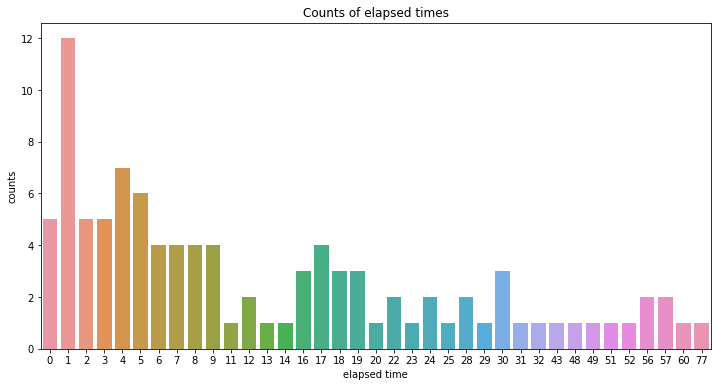

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

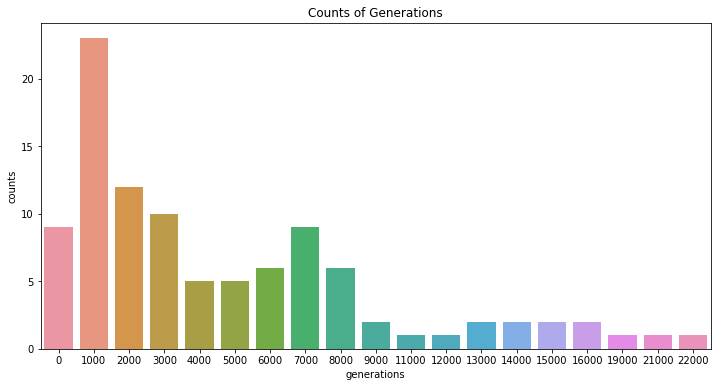

In [94]:
plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)